 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [151]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [153]:
# Reading whale returns
whale_returns_csv_path = Path('Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df.head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [167]:
# Count nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [168]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [170]:
# Reading algorithmic returns
algo_returns_csv_path = Path('Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [157]:
# Count nulls
algo_returns_df.isnull().mean() * 100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [171]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [172]:
# Reading S&P 500 Closing Prices
sp500_history_csv_path = Path('Resources/sp500_history.csv')
sp500_history_df = pd.read_csv(sp500_history_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_history_df = sp500_history_df.sort_index()

In [173]:
# Check Data Types
print(sp500_history_df['Close'].dtypes)

object


In [174]:
# Fix Data Types
#Remove '$' and commas S&P 500 dataframe
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '', regex=True).astype(float)
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [175]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [178]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.isnull().sum()

S&P 500    0
dtype: int64

In [216]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={'Close':'S&P 500'}, inplace=True)
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [217]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis = 'columns', join = 'inner')
combined_returns.sort_index(inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Combined Daily Returns for all Portfolios'}, xlabel='Date'>

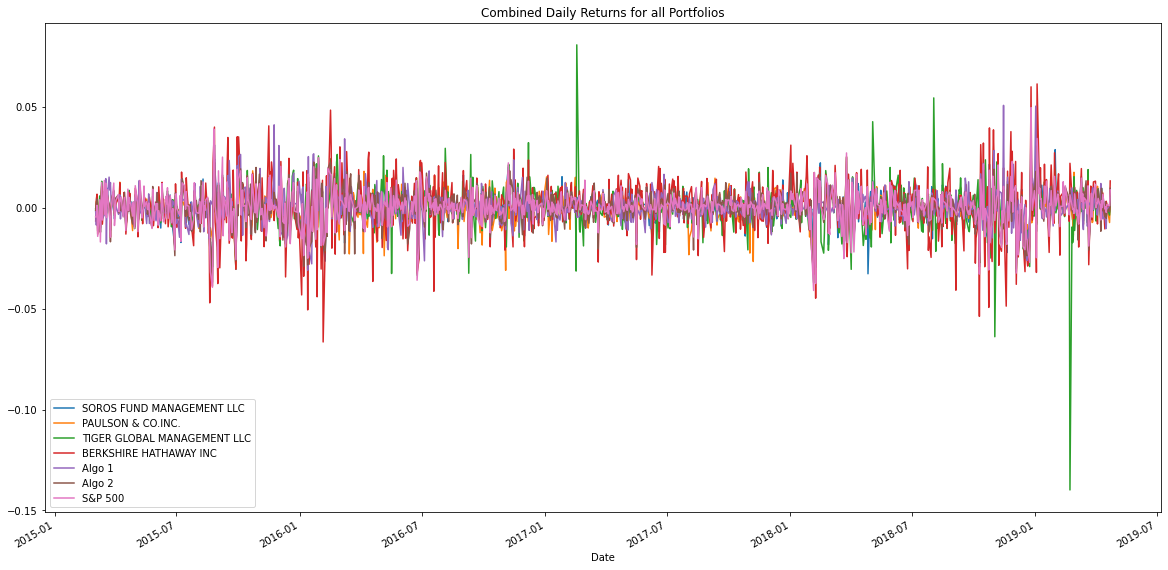

In [279]:
# Plot daily returns of all portfolios
combined_returns.plot(title='Combined Daily Returns for all Portfolios',figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cummulative Returns for all Portfolios'}, xlabel='Date'>

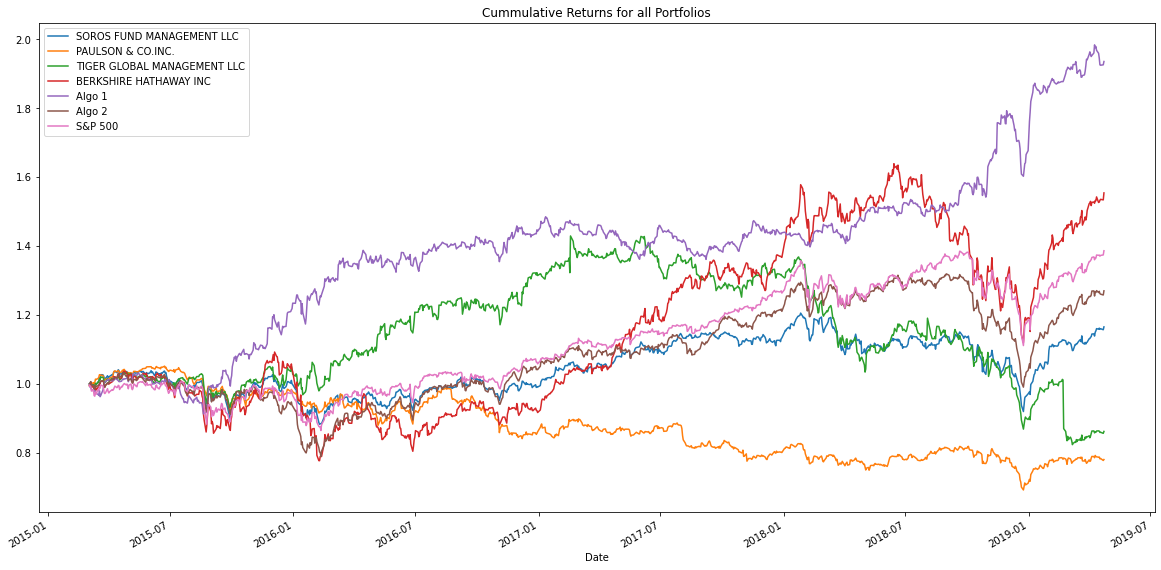

In [376]:
# Calculate cumulative returns of all portfolios
cummulative_returns = (1 + combined_returns).cumprod()

# Plot cumulative returns
cummulative_returns.plot(title='Cummulative Returns for all Portfolios',figsize=(20,10))

---

Early in the time period, most funds tracked the S&P 500 with Tiger and Algo 1 outperforming substantially.  Later
Berkshire seemed to do better, while Tiger did worse than the S&P 500.  Algo 1 was consistently outperforming all portfolios.

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

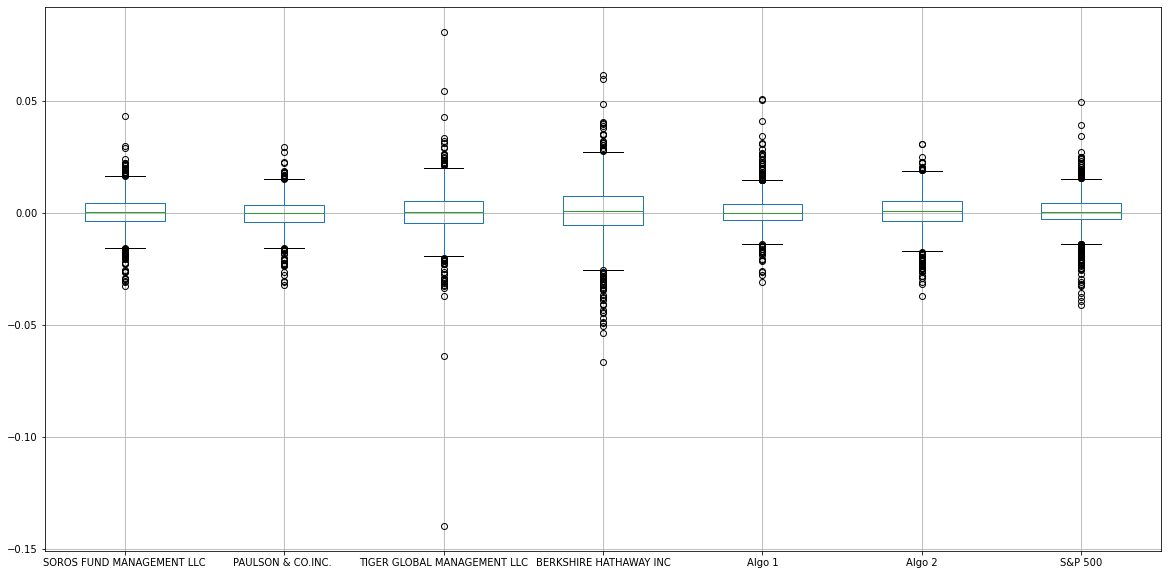

In [276]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [377]:
# Calculate the daily standard deviations of all portfolios
whale_returns_daily_std = whale_returns_df.std()
algo_returns_daily_std = algo_returns_df.std()
print(whale_returns_daily_std, algo_returns_daily_std)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64 Algo 1    0.007988
Algo 2    0.008466
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [378]:
# Calculate the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
print(sp500_daily_std)

S&P 500    0.008111
dtype: float64


Determine which portfolios are riskier than the S&P 500
Answer:  The portfolios with the highest standard deviations, and thus most risk, are Tiger Global and Berkshire Hathaway

### Calculate the Annualized Standard Deviation

In [380]:
# Calculate the annualized standard deviation (252 trading days)
whale_returns_annualized_std = whale_returns_df.std()* np.sqrt(252)
algo_returns_annualized_std = algo_returns_df.std()* np.sqrt(252)
sp500returns_annualized_std = sp500_daily_returns.std()* np.sqrt(252)
print(whale_returns_annualized_std, algo_returns_annualized_std, sp500returns_annualized_std)
print('---------------------------------')
combined_returns_annualized_std = combined_returns.std()* np.sqrt(252)
print(combined_returns_annualized_std)

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64 Algo 1    0.126801
Algo 2    0.134401
dtype: float64 S&P 500    0.128762
dtype: float64
---------------------------------
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

SOROS FUND MANAGEMENT LLC      0.007281
PAULSON & CO.INC.              0.006678
TIGER GLOBAL MANAGEMENT LLC    0.009757
BERKSHIRE HATHAWAY INC         0.011862
dtype: float64 Algo 1    0.007096
Algo 2    0.007791
dtype: float64 S&P 500    0.007438
dtype: float64


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviations'}, xlabel='Date'>

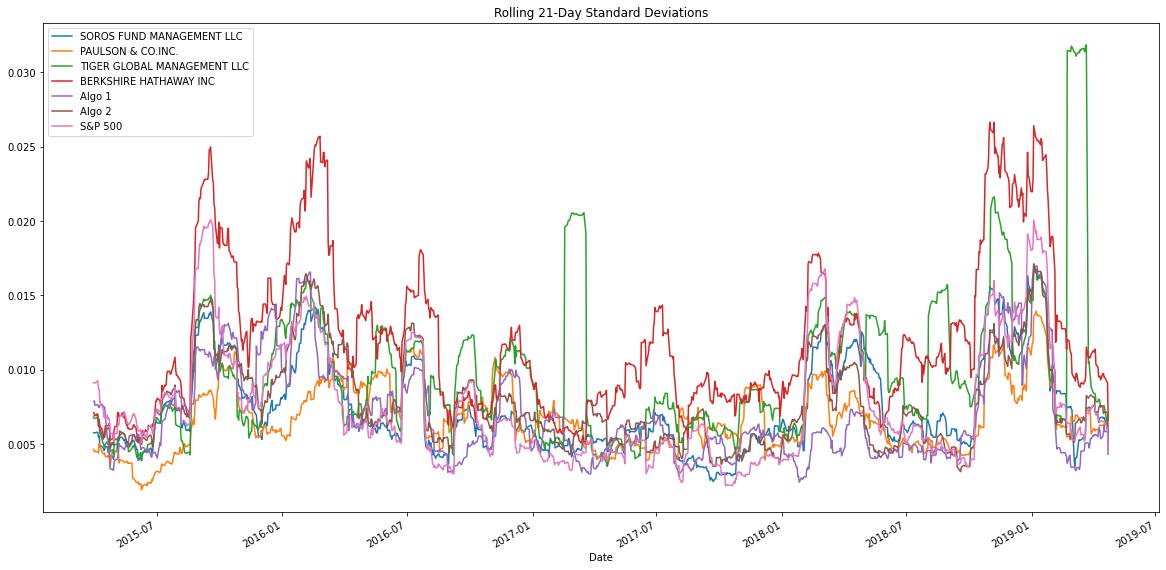

In [381]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_returns_rolling_std_21 = whale_returns_df.rolling(window=21).std().mean()
algo_returns_rolling_std_21 = algo_returns_df.rolling(window=21).std().mean()
sp500_returns_rolling_std_21 = sp500_daily_returns.rolling(window=21).std().mean()
combined_returns_rolling_21 = combined_returns.rolling(window=21).std().mean()
print(whale_returns_rolling_std_21, algo_returns_rolling_std_21, sp500_returns_rolling_std_21)

# Plot the rolling standard deviation
combined_returns.rolling(window = 21).std().plot(title='Rolling 21-Day Standard Deviations',figsize=(20,10))

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

<AxesSubplot:title={'center':'S&P 500 Correlations'}, xlabel='Date'>

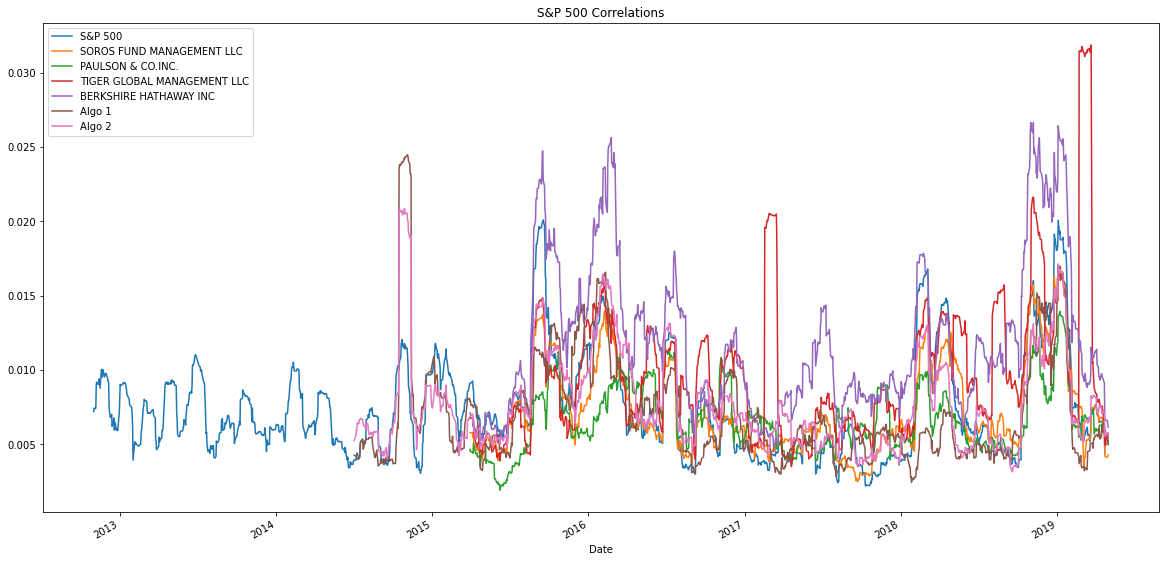

In [366]:
# Calculate the correlation
correlation = combined_returns.corr()

# Display de correlation matrix
print(correlation)

#correlation.plot(figsize=(20,10))
ax = sp500_daily_returns.rolling(window=21).std().plot(title='S&P 500 Correlations',figsize=(20,10))

whale_returns_df.rolling(window = 21).std().plot(ax = ax)
algo_returns_df.rolling(window = 21).std().plot(ax = ax)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

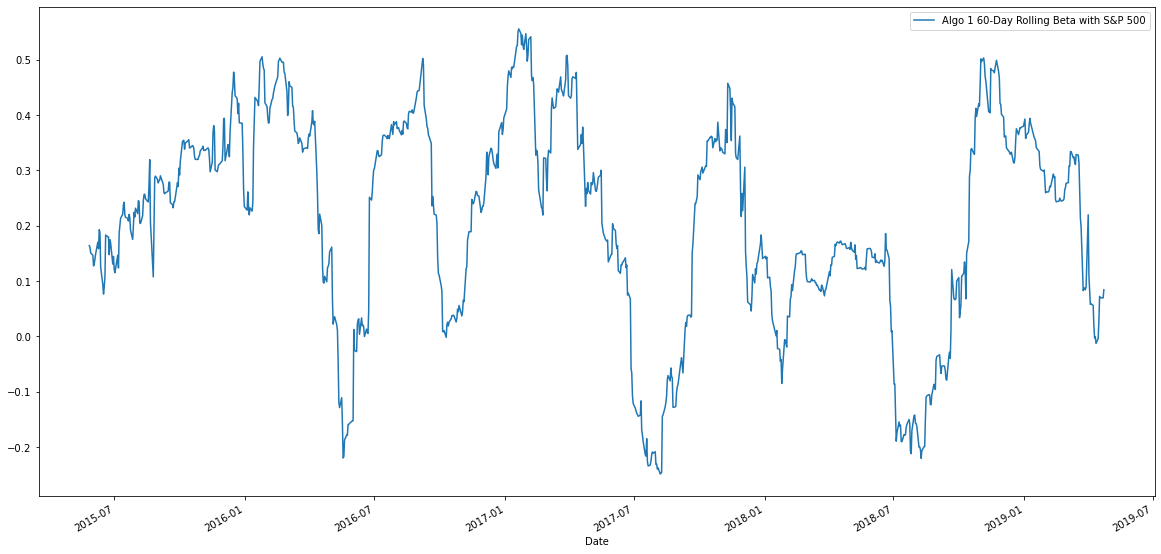

In [263]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_returns['Algo 1'].cov(combined_returns['S&P 500'])
algo1_covariance

# Calculate variance of S&P 500
variance = combined_returns['S&P 500'].var()
variance

# Computing beta
algo1_beta = algo1_covariance / variance
algo1_beta

# Plot beta trend
rolling_algo1_covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['S&P 500'])
rolling_variance = combined_returns['S&P 500'].rolling(window=60).var()
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance

ax = rolling_algo1_beta.plot(figsize=(20,10))
ax.legend(['Algo 1 60-Day Rolling Beta with S&P 500'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [281]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

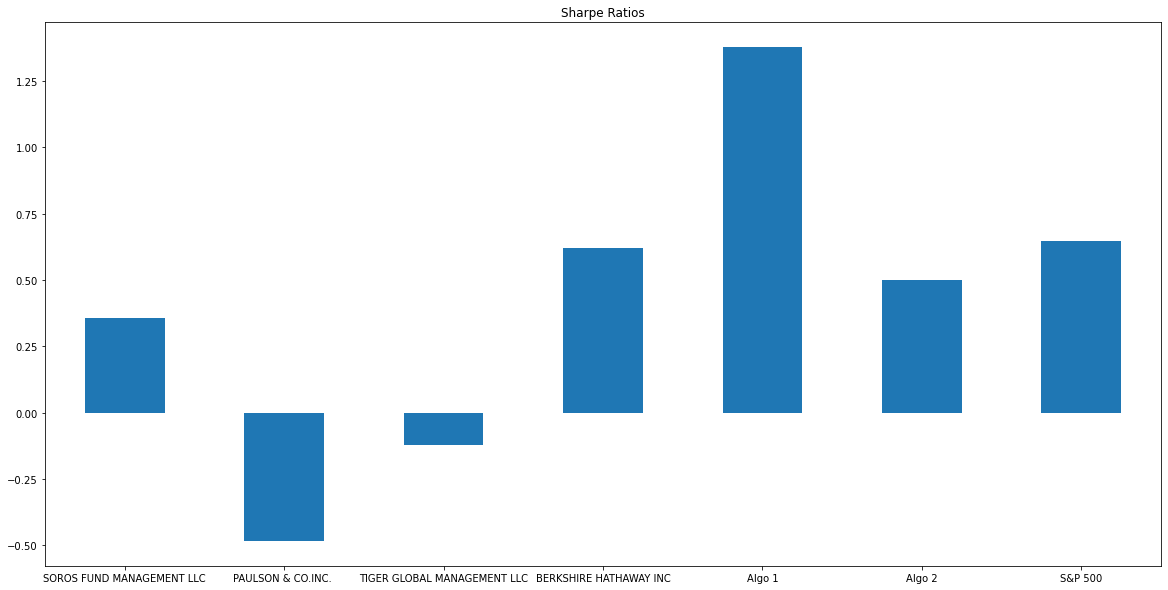

In [282]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios',rot=0, figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithm 1 outperformed both the market and the whales portfolios.  It also had a good Sharpe Ratio of 1.25, which is better than all other portfolios and the market.  Algorithm 2 outperformed all other portfolios except the market and Berkshire Hathaway.  It's Sharpe ratio was much lower than Algorithm 1, Berkshire, and the market.  Algorithm 1 is definitely the superior portfolio all around.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [310]:
# Reading data from 1st stock
aapl_csv_path = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_csv_path, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
aapl_df = aapl_df.drop(columns='Symbol')
aapl_df = aapl_df.sort_index()
aapl_df.head()

,NOCP
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [311]:
# Reading data from 2nd stock
cost_csv_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_csv_path, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
cost_df = cost_df.drop(columns='Symbol')
cost_df = cost_df.sort_index()
cost_df.head()

,NOCP
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [312]:
# Reading data from 3rd stock
goog_csv_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_csv_path, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
goog_df = goog_df.drop(columns='Symbol')
goog_df = goog_df.sort_index()
goog_df.head()

,NOCP
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [382]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([aapl_df, cost_df, goog_df], axis = 'columns', join = 'inner')
combined_stocks_df.sort_index(inplace=True)
combined_stocks_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [383]:
# Reset Date index
combined_stocks_df.reset_index()
combined_stocks_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [384]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_df.columns = ['Apple', 'Costco', 'Google']
combined_stocks_df.head()

,Apple,Costco,Google
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [356]:
# Calculate daily returns
daily_returns = combined_stocks_df.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

,Apple,Costco,Google
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [357]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [360]:
# Join your returns DataFrame to the original returns DataFrame
all_together = pd.concat([combined_returns, portfolio_returns], axis = 'columns', join = 'inner')
all_together = all_together.rename(columns={0: 'My Portfolio'})
all_together.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [361]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_together.isnull().mean() * 100
all_together.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [362]:
# Calculate the annualized `std`
all_together_annualized_std = all_together.std()* np.sqrt(252)
all_together_annualized_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
My Portfolio                   0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviations'}>

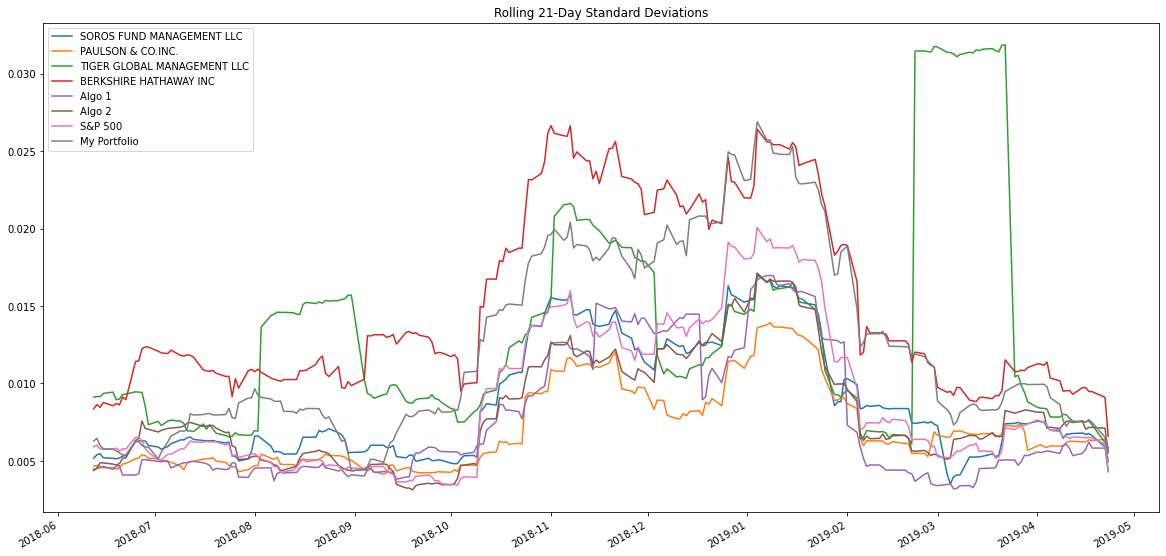

In [363]:
# Calculate rolling standard deviation
all_together_rolling_std_21 = all_together.rolling(window=21).std().mean()

# Plot rolling standard deviation
all_together.rolling(window = 21).std().plot(title='Rolling 21-Day Standard Deviations',figsize=(20,10))

### Calculate and plot the correlation

In [365]:
# Calculate and plot the correlation
all_together_correlations = all_together.corr()
all_together_correlations

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
My Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

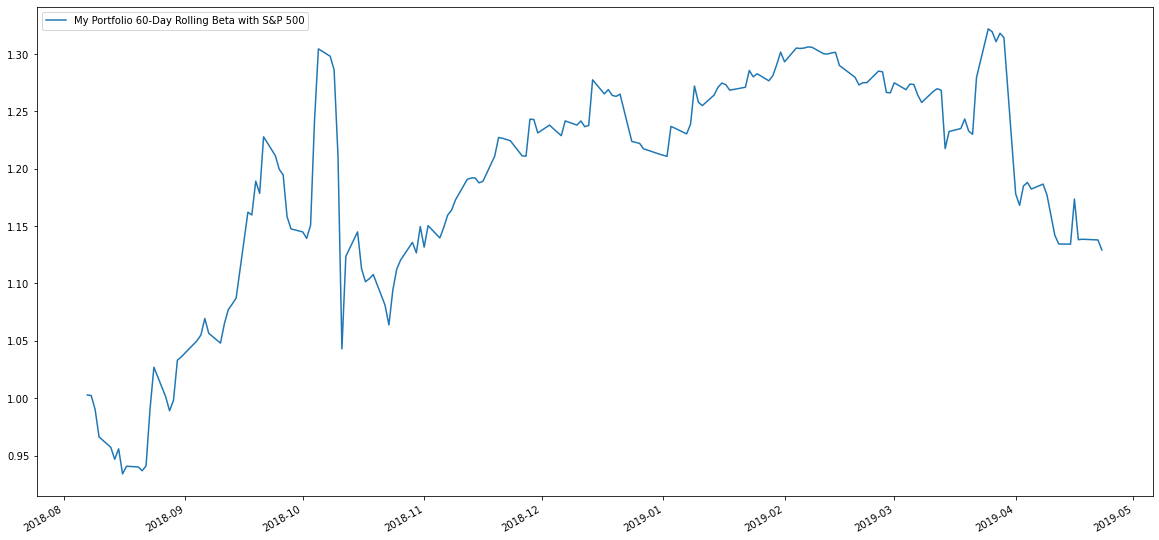

In [368]:
# Calculate Beta
my_portfolio_covariance = all_together['My Portfolio'].cov(all_together['S&P 500'])
my_portfolio_covariance

# Calculate variance of S&P 500
my_portfolio_variance = all_together['S&P 500'].var()
my_portfolio_variance

# Computing beta
my_portfolio_beta = my_portfolio_covariance / variance
my_portfolio_beta

# Plot rolling 60-day beta 
rolling_my_port_covariance = all_together['My Portfolio'].rolling(window=60).cov(all_together['S&P 500'])
rolling_my_port_variance = all_together['S&P 500'].rolling(window=60).var()
rolling_my_port_beta = rolling_my_port_covariance / rolling_my_port_variance

ax_2 = rolling_my_port_beta.plot(figsize=(20,10))
ax_2.legend(['My Portfolio 60-Day Rolling Beta with S&P 500'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [370]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = (all_together.mean() * 252) / (all_together.std() * np.sqrt(252))
sharpe_ratios_2

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
My Portfolio                   0.933123
dtype: float64

<AxesSubplot:>

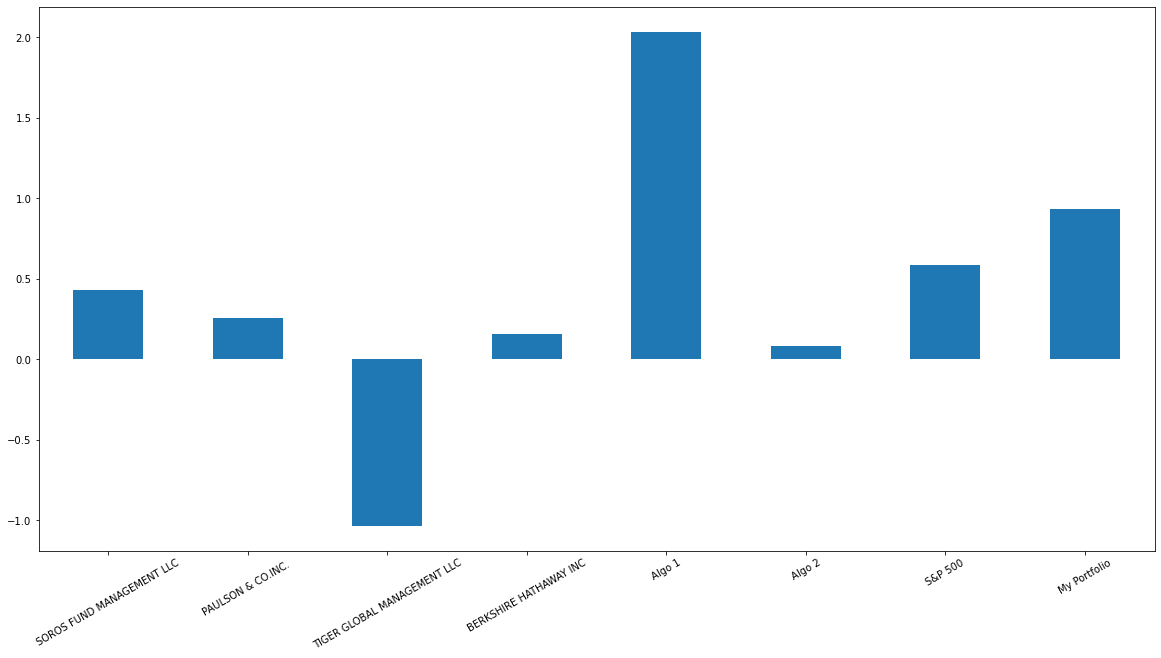

In [375]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot.bar(figsize=(20,10),rot=30)

### How does your portfolio do?

Write your answer here!

My portfolio did not perform as well as the Algo 1 portfolio.  It did operate fairly close to the S&P 500 and had a better Sharpe ratio.